# Data visualisations

## Setup

### Imports

In [1]:
import titanic
from titanic.dataset import load_titanic_data

import numpy as np

import matplotlib.pyplot as plt

### Data loading

In [2]:
training_file = "../dataset/train.csv"

training_data = load_titanic_data(training_file)
print("Training data loaded. Number of records:", len(training_data))

Training data loaded. Number of records: 891


## Distributions

In [3]:
adults = [person for person in training_data if person['Age'] and float(person['Age']) >= 18]
child = [person for person in training_data if person['Age'] and float(person['Age']) < 18]

female_survived = [person for person in training_data if person['Sex'] == 'female']
male_survived = [person for person in training_data if person['Sex'] == 'male']
child_survived = [person for person in child if person['Survived'] == '1']

### Pie charts

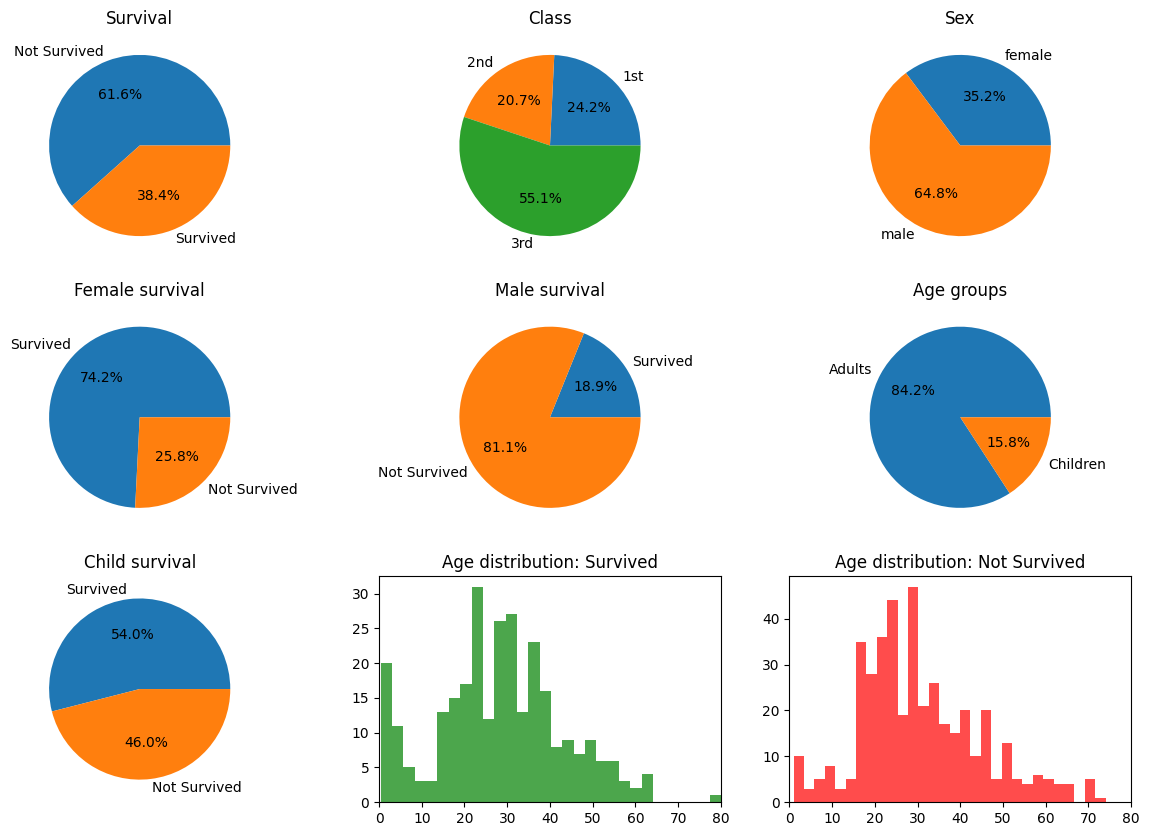

In [4]:
pclass_data = [int(person['Pclass']) for person in training_data]
sex_data = [person['Sex'] for person in training_data]
survived_data = [int(person['Survived']) for person in training_data]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

survived_ax = axs[0][0]
survived_ax.set_title("Survival")
survived_ax.pie(
    [survived_data.count(0), survived_data.count(1)],
    labels=["Not Survived", "Survived"],
    autopct='%1.1f%%',
)

class_ax = axs[0][1]
class_ax.set_title("Class")
class_ax.pie(
    [pclass_data.count(i) for i in range(1, 4)], 
    labels=["1st", "2nd", "3rd"], 
    autopct='%1.1f%%',
)

sex_ax = axs[0][2]
sex_ax.set_title("Sex")
sex_ax.pie(
    [sex_data.count('female'), sex_data.count('male')],
    labels=["female", "male"],
    autopct='%1.1f%%',
)

female_survived_ax = axs[1][0]
female_survived_ax.set_title("Female survival")
female_survived_ax.pie(
    [len([female for female in female_survived if female['Survived'] == '1']), 
     len([female for female in female_survived if female['Survived'] == '0'])],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

male_survived_ax = axs[1][1]
male_survived_ax.set_title("Male survival")
male_survived_ax.pie(
    [len([male for male in male_survived if male['Survived'] == '1']), 
     len([male for male in male_survived if male['Survived'] == '0'])],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

child_adult_ax = axs[1][2]
child_adult_ax.set_title("Age groups")
child_adult_ax.pie(
    [len(adults), len(child)],
    labels=["Adults", "Children"],
    autopct='%1.1f%%',
)

child_survived_ax = axs[2][0]
child_survived_ax.set_title("Child survival")
child_survived_ax.pie(
    [len(child_survived), len(child) - len(child_survived)],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

age_hist_survived_ax = axs[2][1]
age_hist_survived_ax.set_title("Age distribution: Survived")
ages_survived = [float(person['Age']) for person in training_data if person['Age'] and person['Survived'] == '1']
age_hist_survived_ax.hist(ages_survived, bins=30, color='green', alpha=0.7)
age_hist_survived_ax.set(xlim=(0, 80), xticks=np.arange(0, 81, 10))

age_hist_not_survived_ax = axs[2][2]
age_hist_not_survived_ax.set_title("Age distribution: Not Survived")
ages_not_survived = [float(person['Age']) for person in training_data if person['Age'] and person['Survived'] == '0']
age_hist_not_survived_ax.hist(ages_not_survived, bins=30, color='red', alpha=0.7)
age_hist_not_survived_ax.set(xlim=(0, 80), xticks=np.arange(0, 81, 10))

plt.show()

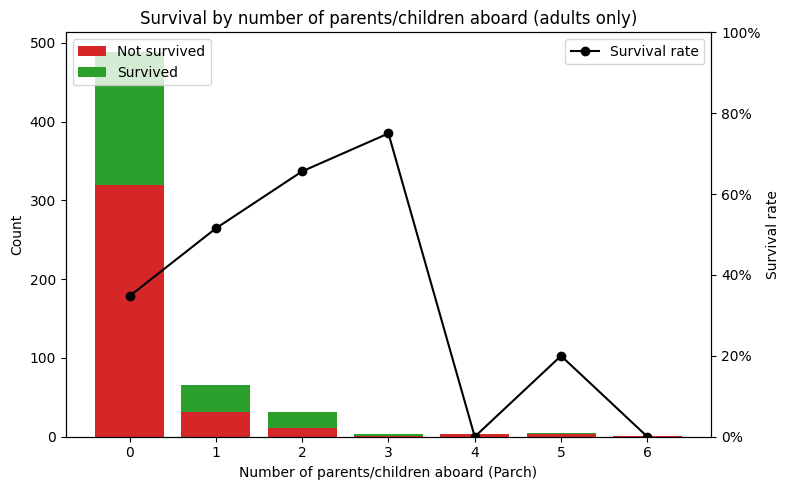

In [7]:
# Plot: number of parents/children aboard (Parch) vs survival
from collections import defaultdict
from matplotlib.ticker import PercentFormatter

# Aggregate counts by Parch for adults only (Age >= 18). Treat missing/non-numeric as 0.
parch_counts = defaultdict(lambda: {'survived': 0, 'not': 0})
for person in training_data:
    age_raw = person.get('Age', '')
    try:
        # skip if age is missing or non-numeric
        if age_raw == '':
            continue
        age = float(age_raw)
    except Exception:
        # skip malformed age values
        continue
    # only include adults
    if age < 18:
        continue

    parch_raw = person.get('Parch', '')
    try:
        p = int(parch_raw) if parch_raw != '' else 0
    except Exception:
        # skip malformed Parch values
        continue
    if person.get('Survived') == '1':
        parch_counts[p]['survived'] += 1
    else:
        parch_counts[p]['not'] += 1

# Sort by number of children/parents and prepare series
ks = sorted(parch_counts.keys())
survived = [parch_counts[k]['survived'] for k in ks]
not_surv = [parch_counts[k]['not'] for k in ks]
totals = [s + n for s, n in zip(survived, not_surv)]
rate = [s / t if t > 0 else 0 for s, t in zip(survived, totals)]

# Plot stacked bars for counts and a line for survival rate
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(ks, not_surv, label='Not survived', color='tab:red')
ax.bar(ks, survived, bottom=not_surv, label='Survived', color='tab:green')
ax.set_xlabel('Number of parents/children aboard (Parch)')
ax.set_ylabel('Count')
ax.set_title('Survival by number of parents/children aboard (adults only)')
ax.set_xticks(ks)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(ks, rate, color='black', marker='o', label='Survival rate')
ax2.set_ylabel('Survival rate')
ax2.set_ylim(0, 1)
# Format right y-axis as percent using PercentFormatter
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
